# Алгоритм для критерия Колмогорова

Проверка выборки на нормальность по критерию Колмогорава:
1. Вычислить куммулятивную эмперическую функцию распределения;
2. Вычислить максимальное отклонение теоретической функции распределения от эмперической $D$;
3. Вычислить $L = D\sqrt{n}$;
4. Задать параметр $L_\alpha$, по которому вычисляется уровень значимости критерия $\alpha$;
   $\alpha = 1 - \sum_{k=-\infty}^{\infty} (-1)^k exp(-2k^2L_\alpha)$;
5. Если $L < L_\alpha$, то выборка удовлетворяет условию нормальности.

# Список используемых функций

* **read_sample** – чтение выборки из файла;

  возвращает выборку в виде питоновского листа;
* **cdf_ext** – вычисление значений эмпирической и теоретической функций распределения с использованием дополнительных точек, чтобы эмпирическая функция получилась в ступенчатом виде;

  возвращает точки для построения графиков
* **plot_cdf** – построение графиков эмпирической и теоретической функций распределения в одном поле;
* **cdf** – вычисление значений эмпирической функции распределения в точках выборки;

  возвращает значения функции в точках выборки;
* **sig_level** – вычисление уровня значимости критерия по данному параметру;

  возвращает значение критерия;
* **kolmogorov_criteria** – функция для проверки выборки на нормальность

  выводит на экран значение L;
  
  возвращает True, если выборка удовлетворяет услвию нормальности, False – в противному случае;
  
* **process_sample** – программный компонет для проверки выборки на нормальность, который использует все перечисленные функии;
 
   ### Функциональность:
   * ввод имени файла с выборкой;
   * чтение выборки из файла;
   * расчет и печать выборочного среднего и СКО;
   * построение графика;
   * ввод значения $L_\alpha$;
   * расчет и печать значений $L$ и $\alpha$;
   * вывод результата проверки на нормальность.

In [2]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
plt.style.use("classic")

In [3]:
def read_sample(file_name):
    """
    Function to read the sample from file into the list.
    """
    data = []
    f = open(file_name, 'r')
    data = f.read().replace('\t', ' ').replace(',', '.').replace('\n', '').split(' ')
    f.close()
    return np.array(data).astype(np.float)

In [4]:
def cdf_ext(sample):
    """
    Function to build emperical distribution function.
    Additional points in order to make it stair-like.
    """
    
    # Return unique sorted points and their counts
    x, counts = np.unique(sample, return_counts=True)
    
    # Cummulative sum of points devided by sample size
    Fx = np.cumsum(counts).astype(np.double) / sample.size
    
    # Extended lists with additional points to make the function sharper
    x_ext = []
    Fx_ext = []
    
    x_ext.append(x[0])
    Fx_ext.append(0)
    
    for i in range(np.size(x) - 1):
        for num in np.linspace(x[i], x[i + 1], 100):
            x_ext.append(num)
        for _ in range(100):
            Fx_ext.append(Fx[i])
            
    x_ext.append(x[-1])
    Fx_ext.append(Fx[-1])
    
    return x_ext, Fx_ext

In [5]:
def plot_cdf(sample):
    """
    Plot both emperical and theoretical cummulative distribution functions.
    """
    
    # loc – sample mean
    # scale – sample standard deviation
    normal_dist = stats.norm(loc=np.mean(sample), scale=np.std(sample))
    
    x_emp, Fx_emp = cdf_ext(sample)
    
    #x_th = np.linspace(x_emp[0], x_emp[-1], 1000)
    x_th = x_emp
    Fx_th = normal_dist.cdf(x_th)
    
    plt.figure(figsize=(12, 8))
    plt.title('Cummulative Distribution Function')
    plt.plot(x_th, Fx_th, '-k', lw=2, label='Theoretical CDF')
    plt.plot(x_emp, Fx_emp, '-r', lw=2, label='Empirical CDF')
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.legend(fancybox=True, loc='right')
    plt.show()

In [6]:
def cdf(sample):
    """
    Ecdf which is to be used in the Kolmogorov criteria.
    No additional points.
    """
    
    # Return unique sorted points and their counts
    x, counts = np.unique(sample, return_counts=True)
    
    # Cummulative sum of points devided by sample size
    Fx = np.cumsum(counts).astype(np.double) / sample.size
    
    return x, Fx

In [7]:
def sig_level(L):
    """
    Calculate alpha
    """
    
    s = 0
    
    # from -infinity to +infinity
    for k in range(-1000000, 1000000):
        s += (-1)**(k) * np.exp(-2 * k**2 * L**2)
    return 1 - s

In [8]:
def kolmogorov_criteria(sample, L_alpha):
    x, fx_emp = cdf(sample)
    normal_dist = stats.norm(loc=np.mean(sample), scale=np.std(sample))
    fx_th = normal_dist.cdf(x)
    
    # Maximal difference between emprical and theoretical cdf
    D = np.max(np.abs(fx_emp - fx_th))
    # criteria parameter
    L = D * np.sqrt(sample.size)
    
    print('L: ', L)
    print('alpha: ', sig_level(L_alpha))
    
    return L < L_alpha

In [9]:
def process_sample():
    file_name = input('Input file name: ')
    print()
    if os.path.isfile(file_name):
        sample = read_sample(file_name)
        print("Mean: ", np.mean(sample))
        print("Standard deviation: ", np.std(sample))
        plot_cdf(sample)
        try:
            L_alpha = float(input('Input L_alpha: '))
        except:
            print('Not a number')
            L_alpha = 1.358
            print('L_alpha: ', L_alpha)
        print('\nSample is normal: ', kolmogorov_criteria(sample, L_alpha))
    else:
        print('No such file')

Input file name: K_v21_a.txt

Mean:  7.663074829931971
Standard deviation:  0.0129924564379029


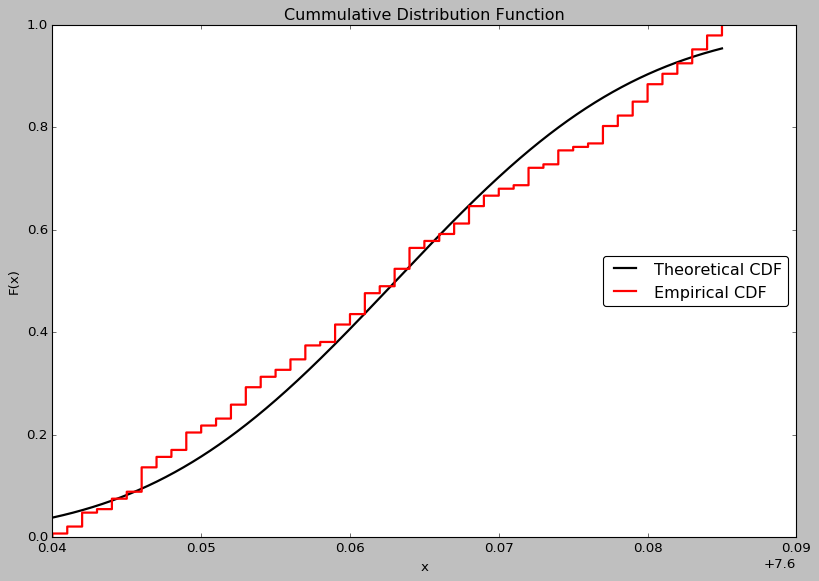

Input L_alpha: 1.358
L:  0.8908519814896176
alpha:  0.05002679733444704

Sample is normal:  True


In [10]:
process_sample()

Input file name: K_v21_b.txt

Mean:  5.61875
Standard deviation:  0.0012538402548233566


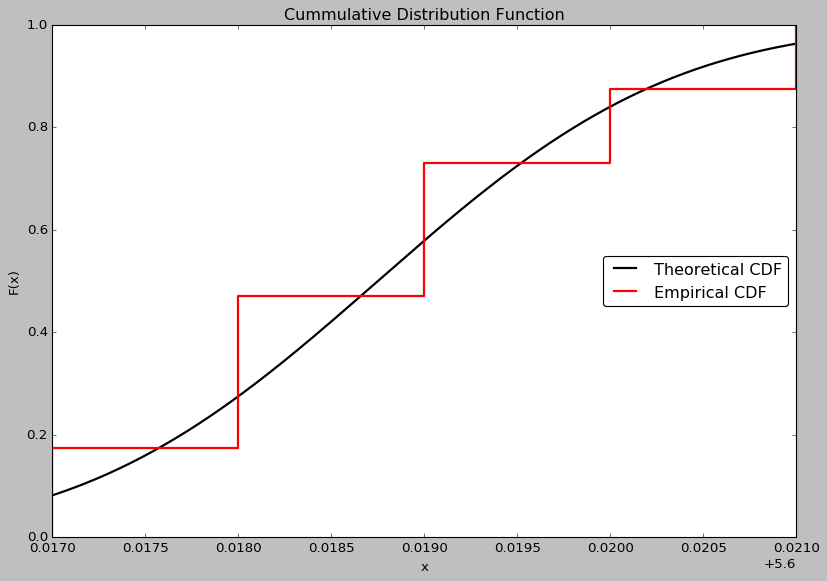

Input L_alpha: 1.358
L:  2.0017530106464783
alpha:  0.05002679733444704

Sample is normal:  False


In [11]:
process_sample()

Input file name: K_v21_c.txt

Mean:  3.206303703703704
Standard deviation:  0.00864807756335698


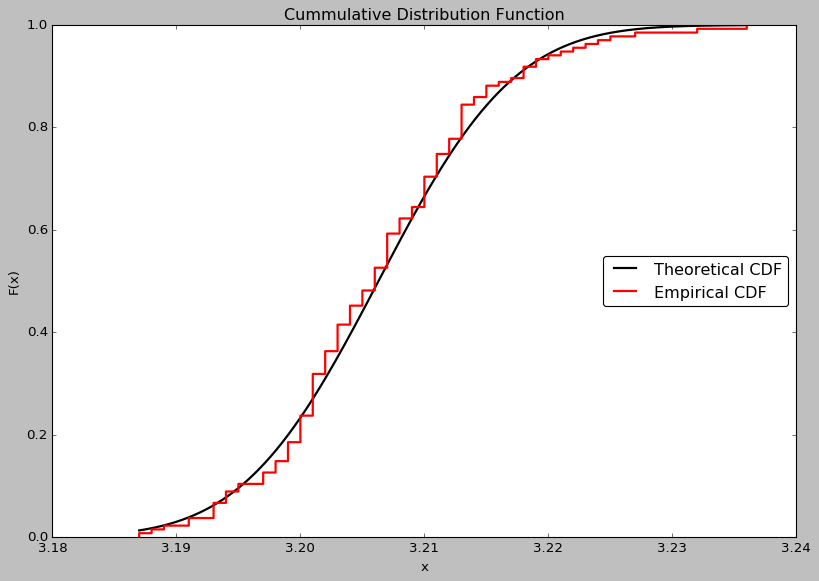

Input L_alpha: 1.358
L:  0.7414990295355397
alpha:  0.05002679733444704

Sample is normal:  True


In [12]:
process_sample()